# Cookie

随着服务器端的响应发送给客户端浏览器。然后客户端浏览器会把Cookie保存起来，当下一次再访问服务器时把Cookie再发送给服务器。 Cookie是由服务器创建，然后通过响应发送给客户端的一个键值对。<font color="red">客户端会保存Cookie，并会标注出Cookie的来源(哪个服务器的Cookie)。</font>当客户端向服务器发出请求时会把所有这个服务器Cookie包含在请求中发送给服务器，这样服务器就可以识别客户端了！
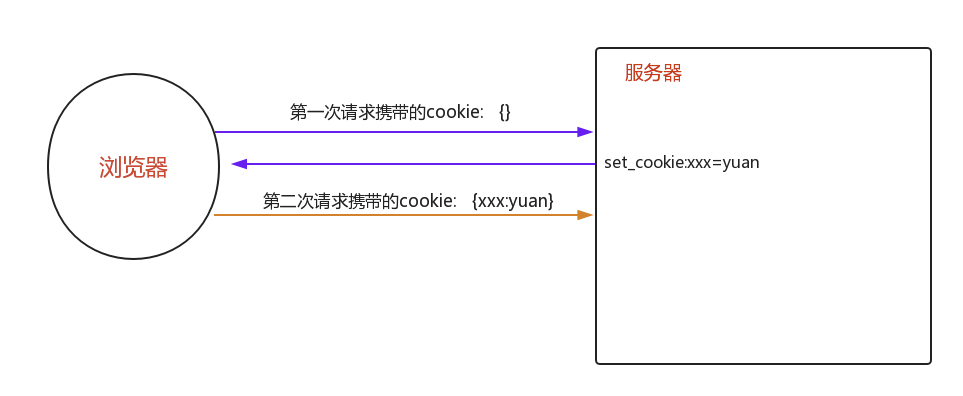

## Cookie规范

* Cookie大小上限为4KB； 
* 一个服务器最多在客户端浏览器上保存的Cookie个数有限制； 
* 一个浏览器最多保存不同cookie服务器的个数有限制；  

上面的数据只是HTTP的Cookie规范，但在浏览器大战的今天，一些浏览器为了打败对手，为了展现自己的能力起见，可能对Cookie规范“扩展”了一些，例如每个Cookie的大小为8KB，最多可保存500个Cookie等！但也不会出现把硬盘占满的可能！ 
注意，不同浏览器之间是不共享Cookie的。也就是说在你使用IE访问服务器时，服务器会把Cookie发给IE，然后由IE保存起来，当你在使用FireFox访问服务器时，不可能把IE保存的Cookie发送给服务器。

## Cookie与HTTP头 

Cookie是通过HTTP请求和响应头在客户端和服务器端传递的：

1. Cookie：请求头，客户端发送给服务器端；格式：Cookie: a=A; b=B; c=C。即多个Cookie用分号离开； 
2. Set-Cookie：响应头，服务器端发送给客户端； 一个Cookie对象一个Set-Cookie： Set-Cookie: a=A Set-Cookie: b=B Set-Cookie: c=C  
## Cookie的覆盖 

如果服务器端发送重复的Cookie那么会覆盖原有的Cookie，例如客户端的第一个请求服务器端发送的Cookie是：Set-Cookie: a=A；第二请求服务器端发送的是：Set-Cookie: a=AA，那么客户端只留下一个Cookie，即：a=AA。

## django中cookie的语法

HttpResponse.set_cookie(key, value='', max_age=None, expires=None, path='/', domain=None, secure=None, httponly=False)
参数如下:

1. max_age默认:None,cookie需要延续的时间（以秒为单位） 如果参数是 None，这个cookie会延续到浏览器关闭为止。cookie失效浏览器会自动删除cookie
2. expires：默认None ,cookie失效的实际日期/时间。 它的格式必须是："Wdy, DD-Mth-YY HH:MM:SS GMT"。值得一提的是目前使用较多的还是max_age, max_age的优先级更高。
3. path： 默认是"/", 指定那个url可以访问到cookie；"/"是所有
4. domain: 默认None,指定那个域名以及它下面的二级域名（子域名）可以访问这个cookie. 你可以使用这个参数设置一个跨站点（cross-domain）的cookie。 比如domain=".example.com" 可以设置一个在 www.example.com 、www2.example.com 以及 an.other.sub.domain.example.com 站点下都可读到的cookie。如果这个参数被设成 None ，cookie将只能在设置它的站点下可以读到。
5. False 默认False ,如果设置为 True ，浏览器将通过HTTPS来回传cookie。
6. httponly=False：限制只能通过http传输，JS无法在传输中获取和修改

获取cookie: request.COOKIES 得到的是一个字典


### 加密cookie

* response.set_signed_cookie('k','v',salt="jac")
* cookies=request.get_signed_cookie('k',salt='jac')


# session

cookie看似解决了HTTP（短连接、无状态）的会话保持问题，但把全部用户数据保存在客户端，存在安全隐患，于是cookie+session出现了！我们可以 把关于用户的数据保存在服务端，在客户端cookie里加一个sessionID（随机字符串）
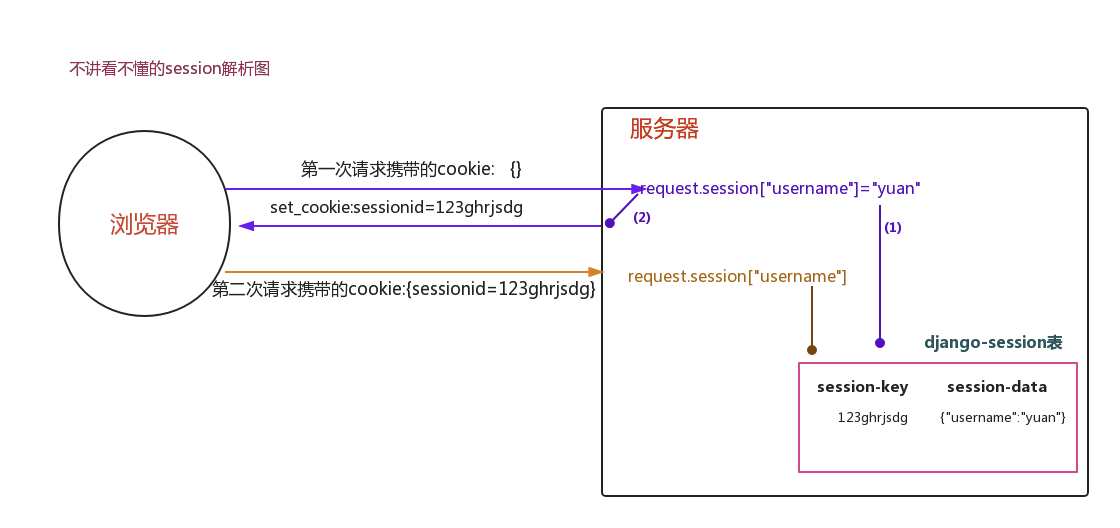

## django session的用法

1. 设置Sessions值: request.session['session_name'] ="admin"
2. 获取Sessions值: session_name = request.session["session_name"]
3. 删除Sessions值:  del request.session["session_name"]
4. flush(): 删除当前的会话数据并删除会话的Cookie: 在本地服务器删除对应的那条记录的同时把用户浏览器cookie也删除
5. get(key, default=None)
6. pop(key)
7. keys()
8. items()
9. setdefault()
10. 用户session的随机字符串
        request.session.session_key
   
        # 将所有Session失效日期小于当前日期的数据删除
        request.session.clear_expired()
   
        # 检查 用户session的随机字符串 在数据库中是否
        request.session.exists("session_key")
   
        # 删除当前用户的所有Session数据
        request.session.delete("session_key")
   
        request.session.set_expiry(value): 这里的cookie失效指的是
            * 如果value是个整数，session会在些秒数后失效。
            * 如果value是个datatime或timedelta，session就会在这个时间后失效。
            * 如果value是0,用户关闭浏览器session就会失效。
            * 如果value是None,session会依赖全局session失效策略。
            
## django session配置

Django默认支持Session，并且默认是将Session数据存储在数据库中，即：django_session 表中。
   
配置 settings.py: 
   
    SESSION_ENGINE = 'django.contrib.sessions.backends.db'   # 引擎（默认）
       
    SESSION_COOKIE_NAME ＝ "sessionid"                       # Session的cookie保存在浏览器上时的key，即：sessionid＝随机字符串（默认）
    SESSION_COOKIE_PATH ＝ "/"                               # Session的cookie保存的路径（默认）
    SESSION_COOKIE_DOMAIN = None                             # Session的cookie保存的域名（默认）
    SESSION_COOKIE_SECURE = False                            # 是否Https传输cookie（默认）
    SESSION_COOKIE_HTTPONLY = True                           # 是否Session的cookie只支持http传输（默认）
    SESSION_COOKIE_AGE = 1209600                             # Session的cookie失效日期（2周）（默认）
    SESSION_EXPIRE_AT_BROWSER_CLOSE = False                  # 是否关闭浏览器使得Session过期（默认）
    SESSION_SAVE_EVERY_REQUEST = False                       # 是否每次请求都保存Session，默认修改之后才保存（默认）
    
    
## 登录session说明

如果每次用户登录，都往session表里增加一条记录，这显然是不合理的，所以一般用来更新session记录。用户A用自身的账号和密码在谷歌浏览器登录了博客园，这样某个sessionid：234231xx 对应session表里的一条记录，此时用户A用另外一个账号密码登录博客园，带着这个sessionid：234231xx 过来，那么服务器端一般做的是是修改这个sessionid对应的记录里的用户信息，而不是新增一条记录，所以如果这时用户A跑到之前自身账号登录的页面刷新发现页面数据是B的数据。但是如果用IE浏览器登录在谷歌浏览器登录的账号是没问题的，但是这样就出现一个用户在不同浏览器进行登录了。那么怎么做到单点登录呢？

